In [1]:
import os
from os.path import expanduser
from grouped_control_prediction.main import main
import pandas as pd
import numpy as np

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools-0.5.0-py3.6.egg/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/work/07431/rmahtab/pysd2cat/test-harness/harness/test_harness_class.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Set up data path
DATA_CONVERGE_PROJECT="sd2e-project-43"
data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_PROJECT)
experiment_dir = os.path.realpath(os.path.join(data_converge_base, 'reactor_outputs', 'complete'))
experiment_dir_contents = [os.path.realpath(os.path.join(experiment_dir, x)) for x in os.listdir(experiment_dir)]

# Prediction Data
experiment_id="YeastSTATES-OR-Gate-CRISPR-Dose-Response"
process_dir = os.path.join(experiment_dir, experiment_id)
experiment_id_dir_contents = [os.path.realpath(os.path.join(process_dir, x)) for x in os.listdir(process_dir)]
experiment_id_dir_contents.sort()
last_process = experiment_id_dir_contents[-1]
print(last_process)

# Control/Training Data
project_id = "sd2e-project-14"

/work/projects/SD2E-Community/prod/projects/sd2e-project-43/reactor_outputs/complete/YeastSTATES-OR-Gate-CRISPR-Dose-Response/20200625204022


Loading prediction data...
Average control distance: 95.9326100762059
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10 (r1c8xx94j94u7_r1c93ajvdzxz5.csv)
2/10 (r1cgbw7hjvxgx_r1cgjxrexhd4j.csv)
3/10 (r1ce3pqt45vfe_r1ce7qf5e483u.csv)
4/10 (r1cft9hhnhjdb_r1cfwgjmz247y.csv)
5/10 (r1cfkpq8n84aj_r1cftg78pbqd7.csv)
6/10 (r1cdfsf4ezew3_r1cdjsyza79sr.csv)
7/10 (r1cctw8wvwpbg_r1ccwteetw82v.csv)
8/10 (r1cf3p48cauwv_r1cf6hech88mh.csv)
9/10 (r1cfkpsmdkgjb_r1cfqbcwrk6vu.csv)
10/10 (r1df5qqzq7k6ss_r1dfjjydmudcfs.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 14:58:39 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 29.86 seconds
Testing time was: 0.88 seconds
Prediction time of untested data was: 69.0549590587616
Run finished at 15:01:14. Total run time = 154.57 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/grouped_control_prediction-0.1-py3.6.egg/grouped_control_prediction/utils/plot.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  controls['log ' + channel] = controls[channel].apply(lambda x: x+1.0).apply(np.log10)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No 

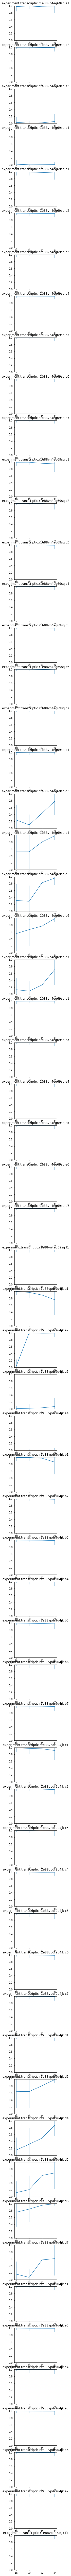

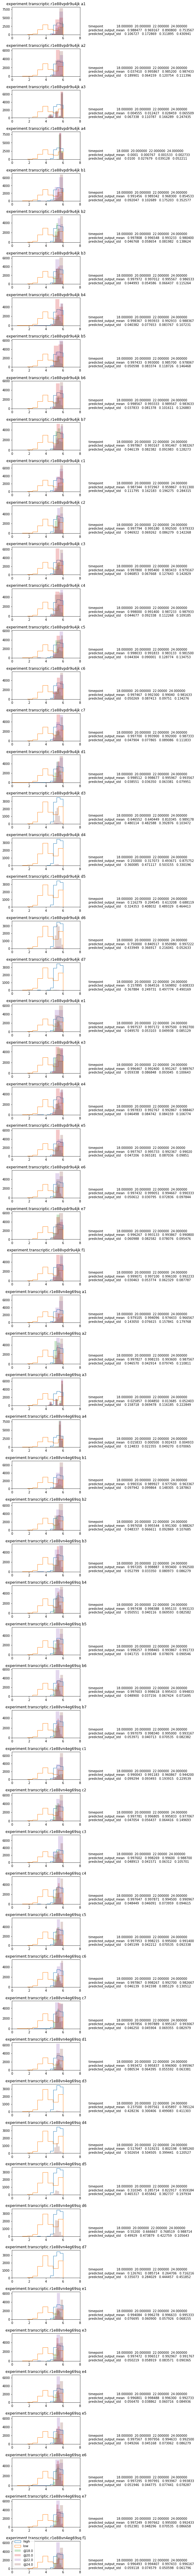

In [3]:
# Run grouped control prediction
low_control = "CRISPR_CEN.PK2_negative_control_23970"
high_control = "CRISPR_CEN.PK2_positive_control_NOR_00_24864"

result, test_accuracy, timeseries_fig, samples_and_controls_fig = main(last_process, project_id, low_control, high_control)

In [4]:
# Test accuracy of grouped control prediction method
test_accuracy

0.96

In [5]:
# Read in optical density (OD) data
OD_DATA_CONVERGE_PROJECT = "sd2e-project-48"
od_data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', OD_DATA_CONVERGE_PROJECT)
od_experiment = os.path.join(od_data_converge_base, )
od_experiment = os.path.realpath(os.path.join(od_data_converge_base, 'complete',
                                              'YeastSTATES-OR-Gate-CRISPR-Dose-Response','20200608231502'))

od_df = pd.read_csv(os.path.join(od_experiment, 'pdt_YeastSTATES-OR-Gate-CRISPR-Dose-Response__od_growth_analysis.csv'))

In [7]:
# Mean and standard deviation of sample predictions aggregated over time
result.groupby(['experiment_id','well_id']).agg({'predicted_output_mean': [np.mean, np.std]})

predicted_output_mean          
                                                                mean       std
experiment_id                          well_id                                
experiment.transcriptic.r1e88vn4eg69sq a1       0.978550              0.011584
                                       a2       0.994287              0.004937
                                       a3       0.024199              0.020681
                                       a4       0.005925              0.006850
                                       b1       0.980278              0.012749
...                                                  ...                   ...
experiment.transcriptic.r1e88vpdr9u4jk e4       0.992983              0.003829
                                       e5       0.994017              0.003381
                                       e6       0.995371              0.003815
                                       e7       0.993517              0.002252
                                       f1       0.996126              0.002874

[62 rows x 2 columns]

In [8]:
# Store both sets of predictions as integers (0/1 -> dead/live)
p1 = np.around(result.groupby(['experiment_id','well_id']).mean().predicted_output_mean.values)
p2 = np.invert(od_df.dead).astype(int).values

In [9]:
# Prediction loss compared to OD labels
od_loss = sum(abs(p2-result.groupby(['experiment_id','well_id']).mean().predicted_output_mean.values))
od_loss

10.302459436576472

In [10]:
# Prediction accuracy compared to OD labels
od_accuracy = sum(p1 == p2)/len(p2)
od_accuracy

0.8548387096774194